In [17]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [19]:
PATH = "data/"
df_raw = pd.read_csv(f'{PATH}ks-projects-201801.csv', low_memory=False, parse_dates=["launched","deadline"])


In [20]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

ID                  0.000000
backers             0.000000
category            0.000000
country             0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
main_category       0.000000
name                0.000011
pledged             0.000000
state               0.000000
usd pledged         0.010027
usd_goal_real       0.000000
usd_pledged_real    0.000000
dtype: float64

In [21]:
add_datepart(df_raw, 'deadline')
add_datepart(df_raw, 'launched')

In [22]:
train_cats(df_raw)

In [23]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/kickstarter-raw')

In [24]:
df_raw.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'goal',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'deadlineYear', 'deadlineMonth',
       'deadlineWeek', 'deadlineDay', 'deadlineDayofweek', 'deadlineDayofyear',
       'deadlineIs_month_end', 'deadlineIs_month_start',
       'deadlineIs_quarter_end', 'deadlineIs_quarter_start',
       'deadlineIs_year_end', 'deadlineIs_year_start', 'deadlineElapsed',
       'launchedYear', 'launchedMonth', 'launchedWeek', 'launchedDay',
       'launchedDayofweek', 'launchedDayofyear', 'launchedIs_month_end',
       'launchedIs_month_start', 'launchedIs_quarter_end',
       'launchedIs_quarter_start', 'launchedIs_year_end',
       'launchedIs_year_start', 'launchedElapsed'],
      dtype='object')

In [25]:
df_raw = pd.read_feather('tmp/kickstarter-raw')

In [26]:
df_raw = df_raw.drop(['ID','name','usd_pledged_real','pledged','usd pledged'],axis=1)
df_raw = df_raw.sort_values(['deadlineYear','deadlineMonth','deadlineDay'])

In [27]:
df, y, nas = proc_df(df_raw, 'state')

In [28]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.99084141223944378

In [29]:
df_raw.shape

(378661, 34)

In [30]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [31]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 50000
n_trn = len(df)-n_valid
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [32]:
m = RandomForestClassifier(n_estimators= 40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2min 4s, sys: 188 ms, total: 2min 4s
Wall time: 33.5 s
[0.44338310991295304, 0.7395809624375144, 0.9265109033320047, 0.76354, 0.82932565774460609]


In [33]:
display_all(df_raw)

,category,main_category,currency,goal,state,backers,country,usd_goal_real,deadlineYear,deadlineMonth,deadlineWeek,deadlineDay,deadlineDayofweek,deadlineDayofyear,deadlineIs_month_end,deadlineIs_month_start,deadlineIs_quarter_end,deadlineIs_quarter_start,deadlineIs_year_end,deadlineIs_year_start,deadlineElapsed,launchedYear,launchedMonth,launchedWeek,launchedDay,launchedDayofweek,launchedDayofyear,launchedIs_month_end,launchedIs_month_start,launchedIs_quarter_end,launchedIs_quarter_start,launchedIs_year_end,launchedIs_year_start,launchedElapsed
138572,Illustration,Art,USD,20.00,successful,3,US,20.00,2009,5,18,3,6,123,False,False,False,False,False,False,1241308800,2009,4,17,24,4,114,False,False,False,False,False,False,1240609923
213711,Journalism,Journalism,USD,3000.00,successful,110,US,3000.00,2009,5,20,16,5,136,False,False,False,False,False,False,1242432000,2009,4,18,28,1,118,False,False,False,False,False,False,1240926941
342226,Rock,Music,USD,300.00,failed,2,US,300.00,2009,5,20,16,5,136,False,False,False,False,False,False,1242432000,2009,4,18,29,2,119,False,False,False,False,False,False,1240982792
28960,Documentary,Film & Video,USD,300.00,failed,4,US,300.00,2009,5,21,20,2,140,False,False,False,False,False,False,1242777600,2009,4,18,30,3,120,True,False,False,False,False,False,1241129430
196244,Illustration,Art,USD,30.00,failed,0,US,30.00,2009,5,21,22,4,142,False,False,False,False,False,False,1242950400,2009,5,20,12,1,132,False,False,False,False,False,False,1242171598
122662,Fashion,Fashion,USD,1900.00,failed,10,US,1900.00,2009,5,22,26,1,146,False,False,False,False,False,False,1243296000,2009,4,18,27,0,117,False,False,False,False,False,False,1240841439
148270,Publishing,Publishing,USD,3000.00,failed,1,US,3000.00,2009,5,22,29,4,149,False,False,False,False,False,False,1243555200,2009,5,19,6,2,126,False,False,False,False,False,False,1241623639
235255,Fiction,Publishing,USD,500.00,successful,18,US,500.00,2009,5,22,29,4,149,False,False,False,False,False,False,1243555200,2009,4,18,29,2,119,False,False,False,False,False,False,1240973930
345606,Shorts,Film & Video,USD,200.00,failed,3,US,200.00,2009,5,22,29,4,149,False,False,False,False,False,False,1243555200,2009,4,18,29,2,119,False,False,False,False,False,False,1240970661
113932,Sculpture,Art,USD,2000.00,failed,1,US,2000.00,2009,5,22,31,6,151,True,False,False,False,False,False,1243728000,2009,5,18,1,4,121,False,True,False,False,False,False,1241187741


In [34]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

(2.8250000000000002, 0.62799283435402353)

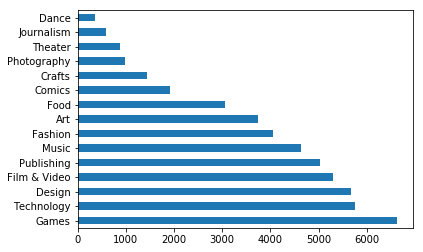

In [35]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.main_category.value_counts().plot.barh();

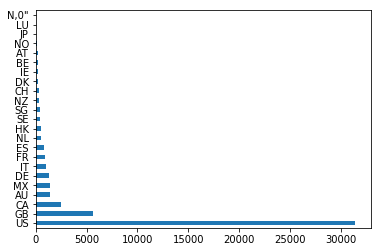

In [36]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.country.value_counts().plot.barh();

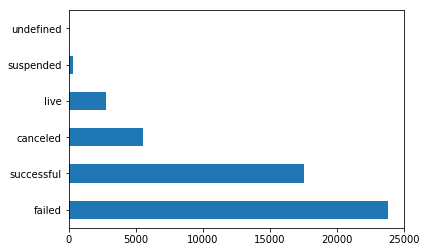

In [37]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.state.value_counts().plot.barh();

In [38]:
flds = ['main_category', 'state', 'pred', 'pred_std']
cat_summ = x[flds].groupby('main_category', as_index=False).mean()
cat_summ

,main_category,pred,pred_std
0,Art,1.616064,0.739106
1,Comics,2.140426,0.718661
2,Crafts,1.303940,0.669477
3,Dance,1.656390,0.795164
4,Design,1.557041,0.766381
5,Fashion,1.355174,0.684525
6,Film & Video,1.423318,0.694246
7,Food,1.244028,0.679228
8,Games,1.659716,0.723997
9,Journalism,1.151054,0.660893


In [39]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
4,backers,0.525410
6,usd_goal_real,0.089697
3,goal,0.056792
0,category,0.035689
32,launchedElapsed,0.034853
19,deadlineElapsed,0.029993
5,country,0.026605
23,launchedDay,0.025793
10,deadlineDay,0.025730
1,main_category,0.024398


In [40]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

17

In [41]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [42]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.44286126443527785, 0.7383765976789893, 0.92683038145688112, 0.76385999999999998, 0.82890272956024602]


In [43]:
from scipy.cluster import hierarchy as hc

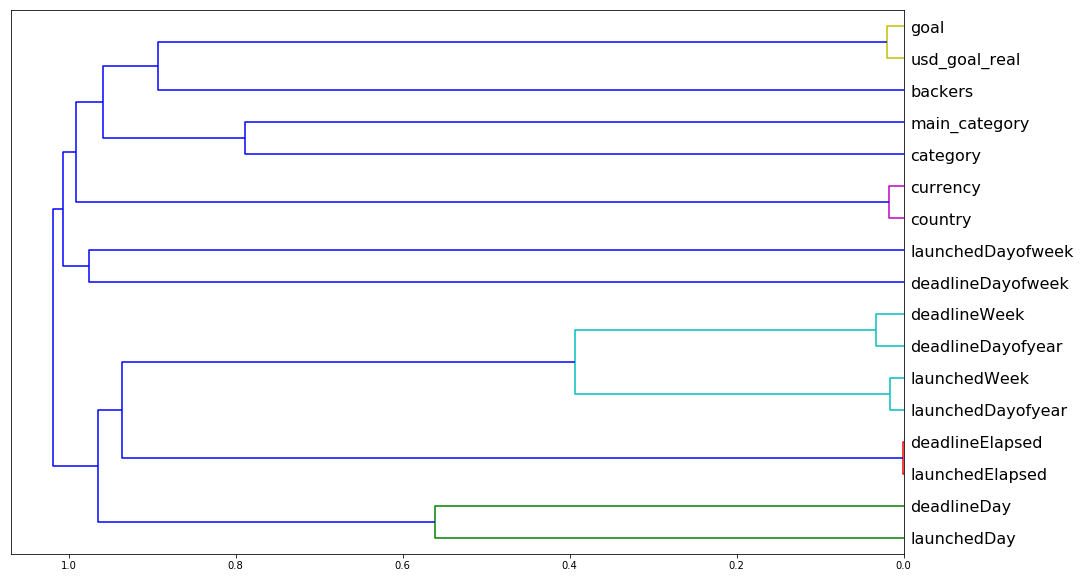

In [44]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [45]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [47]:
for c in ('launchedElapsed', 'launchedDay','launchedWeek','deadlineWeek','currency', 'goal'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

launchedElapsed 0.724938875692
launchedDay 0.723668042822
launchedWeek 0.723826885948
deadlineWeek 0.725030138118
currency 0.723842584287
goal 0.725859586413


In [48]:
to_drop = ['launchedElapsed', 'launchedDay','launchedWeek','deadlineWeek','currency', 'goal']
get_oob(df_keep)

0.72363869247972135

In [49]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [50]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [51]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df[keep_cols]

In [52]:
reset_rf_samples()

In [81]:
m = RandomForestClassifier(n_estimators=100, max_depth= 15, min_samples_leaf=10, 
                           max_features=0.6, bootstrap=False,
                           n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5799329518827148, 0.7282170006255003, 0.85907667779261909, 0.76780000000000004]


In [78]:
??RandomForestClassifier
